In [1]:
import pandas as pd
import numpy as np

### Series

In [2]:
ex1=pd.Series([1,2,3,4])
ex1

0    1
1    2
2    3
3    4
dtype: int64

In [3]:
ex1.values

array([1, 2, 3, 4], dtype=int64)

In [4]:
ex1.index

RangeIndex(start=0, stop=4, step=1)

In [5]:
ex1.index=['a', 'b', 'c', 'd']
ex1.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [6]:
ex2 = pd.Series([1,2,3,4], index=['a', 'b', 'c', 'd'])
ex2

a    1
b    2
c    3
d    4
dtype: int64

In [216]:
ex2[['b','c','d']]

b    2
c    3
d    4
dtype: int64

In [7]:
ex1['a']=5
ex1

a    5
b    2
c    3
d    4
dtype: int64

In [218]:
ex2+ex1

a    6
b    4
c    6
d    8
dtype: int64

In [11]:
ex1/ex2

a    5.0
b    1.0
c    1.0
d    1.0
dtype: float64

In [12]:
ex1*ex2

a     5
b     4
c     9
d    16
dtype: int64

In [13]:
ex3 = pd.Series([1,2,3,4])

In [15]:
ex1+ex3

a   NaN
b   NaN
c   NaN
d   NaN
0   NaN
1   NaN
2   NaN
3   NaN
dtype: float64

In [16]:
ex2.name='新冠人数'
ex2.index.name='地区'
ex2

地区
a    1
b    2
c    3
d    4
Name: 新冠人数, dtype: int64

### Dataframe

In [38]:
data={'state':['Shanghai', 'Shanghai', 'Shanghai', 'Beijing', 'Beijing', 'Beijing'],'year': [2020, 2021, 2022, 2020, 2021, 2022],'pop': [1, 1, 3, 2, 2, 3]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Shanghai,2020,1
1,Shanghai,2021,1
2,Shanghai,2022,3
3,Beijing,2020,2
4,Beijing,2021,2
5,Beijing,2022,3


In [40]:
frame[['state','year']]

,state,year
0,Shanghai,2020
1,Shanghai,2021
2,Shanghai,2022
3,Beijing,2020
4,Beijing,2021
5,Beijing,2022


In [132]:
frame.state###不要用这个，不能读取多行

0    Shanghai
1    Shanghai
2    Shanghai
5     Beijing
Name: state, dtype: object

frame[column]适用于任何列的名，但是frame.column只有在列名是一个合理
的Python变量名时才适用。

In [32]:
frame.rename(columns={'state':'State'})

,State,year,pop
0,Shanghai,2020,1
1,Shanghai,2021,1
2,Shanghai,2022,3
3,Beijing,2020,2
4,Beijing,2021,2
5,Beijing,2022,3


In [52]:
frame.rename(index={0:2})   ###不建议修改行索引，重复时候有问题

,state,year,pop
2,Shanghai,2020,1
1,Shanghai,2021,1
2,Shanghai,2022,3
3,Beijing,2020,2
4,Beijing,2021,2
5,Beijing,2022,3


In [53]:
frame.loc[2]  

state    Shanghai
year         2022
pop             3
Name: 2, dtype: object

In [34]:
frame['debt'] = 16.5
frame['eastern'] = frame.state == 'Shanghai'
frame

,state,year,pop,debt,eastern
0,Shanghai,2020,1,16.5,True
1,Shanghai,2021,1,16.5,True
2,Shanghai,2022,3,16.5,True
3,Beijing,2020,2,16.5,False
4,Beijing,2021,2,16.5,False
5,Beijing,2022,3,16.5,False


# shift+tab查看函数怎么使用！！！

In [57]:
frame2=frame      
frame2.drop([3,4],axis=0,inplace=True)
frame2.drop('year',axis=1)
frame2

,state,year,pop
0,Shanghai,2020,1
1,Shanghai,2021,1
2,Shanghai,2022,3
5,Beijing,2022,3


In [55]:
frame2.drop()

Object ` frame2.drop()` not found.


In [36]:
frame3=frame2.drop([3,4],axis=0)
frame3=frame3.drop('year',axis=1)
frame3

,state,pop,eastern
0,Shanghai,1,True
1,Shanghai,1,True
2,Shanghai,3,True
5,Beijing,3,False


In [232]:
frame3.T

,0,1,2,5
state,Shanghai,Shanghai,Shanghai,Beijing
pop,1,1,3,3
eastern,True,True,True,False


### IO工具 

In [58]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
pd.Series(sdata)

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [59]:
pdata = {'Nevada': {2001: 2.4, 2002: 2.9}, 'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
pd.DataFrame(pdata)

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


# excel不要合并单元格

In [60]:
df=pd.read_excel("D:\Downloads\presentation_schedule_v3.xlsx")
df.head(12)    

,学号,姓名,随机数,日期,时间,次序,Unnamed: 6
0,519091910003,刘少坤（周三）,0.030512,2022-07-03,8:00-8:10,1.0,7/3上午
1,520120910080,张曈（周三）,0.045806,2022-07-03,8:10-8:20,2.0,NaN
2,520120910040,周隽凡（周三）,0.047477,2022-07-03,8:20-8:30,3.0,NaN
3,520021910462,袁依帆（周三）,0.051497,2022-07-03,8:30-8:40,4.0,NaN
4,520021910982,韩兴卓（周三）,0.069428,2022-07-03,8:40-8:50,5.0,NaN
5,520120910130,丁心格（周三）,0.081755,2022-07-03,8:50-9:00,6.0,NaN
6,520021910558,焦滢凯（周三）,0.095264,2022-07-03,9:00-9:10,7.0,NaN
7,520110910017,董礼泽（周三）,0.113710,2022-07-03,9:10-9:20,8.0,NaN
8,520021910771,蔚骁姝（周三）,0.115110,2022-07-03,9:20-9:30,9.0,NaN
9,720602210266,王颖（周三）,0.118300,2022-07-03,9:30-9:40,10.0,NaN


In [236]:
df2= pd.ExcelFile("D:\Downloads\presentation_schedule_v3.xlsx")
pd.read_excel(df2,'sheet1')

,学号,姓名,随机数,日期,时间,次序,Unnamed: 6
0,519091910003,刘少坤（周三）,0.030512,2022-07-03,8:00-8:10,1.0,7/3上午
1,520120910080,张曈（周三）,0.045806,2022-07-03,8:10-8:20,2.0,NaN
2,520120910040,周隽凡（周三）,0.047477,2022-07-03,8:20-8:30,3.0,NaN
3,520021910462,袁依帆（周三）,0.051497,2022-07-03,8:30-8:40,4.0,NaN
4,520021910982,韩兴卓（周三）,0.069428,2022-07-03,8:40-8:50,5.0,NaN
...,...,...,...,...,...,...,...
141,520120910059,柯旭航（周四）,0.832400,2022-07-05,11:10-11:20,42.0,NaN
142,520191910015,周丫丫（周四）,0.854420,2022-07-05,11:20-11:30,43.0,NaN
143,520120910033,傅亦婷（周四）,0.869940,2022-07-05,11:30-11:40,44.0,NaN
144,520111910006,沈天怡（周四）,0.886840,2022-07-05,11:40-11:50,45.0,NaN


In [237]:
df3=pd.read_table("D:\Downloads\新建 文本文档.txt",sep=',')
df3

,key1,key2,value1,value2
0,one,a,1,2
1,one,b,3,4
2,one,c,5,6
3,one,d,7,8
4,two,a,9,10
5,two,b,11,12
6,two,c,13,14
7,two,d,15,16


In [238]:
df4=pd.read_table("D:\Downloads\新建 文本文档.txt",sep=',',index_col=['key1','key2'])
df4

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

In [239]:
pd.read_table("D:\Downloads\新建 文本文档.txt",sep=',',nrows=5)

,key1,key2,value1,value2
0,one,a,1,2
1,one,b,3,4
2,one,c,5,6
3,one,d,7,8
4,two,a,9,10


### 数据切片与布尔索引

In [61]:
Ex = pd.DataFrame({
    "序号":range(1,11),
    "品类":["水果","水果","水果","水果","水果","蔬菜","蔬菜","蔬菜","蔬菜","蔬菜"],
    "商品":["苹果","西瓜","荔枝","龙眼","菠萝","白菜","土豆","豆芽","番茄","豌豆"],
    "销量":range(10,101,10),
    "销额":range(100,1001,100)
})
Ex

,序号,品类,商品,销量,销额
0,1,水果,苹果,10,100
1,2,水果,西瓜,20,200
2,3,水果,荔枝,30,300
3,4,水果,龙眼,40,400
4,5,水果,菠萝,50,500
5,6,蔬菜,白菜,60,600
6,7,蔬菜,土豆,70,700
7,8,蔬菜,豆芽,80,800
8,9,蔬菜,番茄,90,900
9,10,蔬菜,豌豆,100,1000


In [62]:
Ex['商品'].str.contains('豆')   #判断是否包含关键词

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7     True
8    False
9     True
Name: 商品, dtype: bool

In [65]:
Ex[~Ex["品类"].str.contains("水果")]  #筛选出不包含蔬菜的品类(~表示不包含，去除为包含)

,序号,品类,商品,销量,销额
5,6,蔬菜,白菜,60,600
6,7,蔬菜,土豆,70,700
7,8,蔬菜,豆芽,80,800
8,9,蔬菜,番茄,90,900
9,10,蔬菜,豌豆,100,1000


In [66]:
(Ex["商品"].str.contains("豆")) & (Ex["销量"] >= 100)  #交集筛选

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9     True
dtype: bool

In [67]:
Ex[(Ex["销量"] > 90) | (Ex["销量"] < 60)]      #并集筛选

,序号,品类,商品,销量,销额
0,1,水果,苹果,10,100
1,2,水果,西瓜,20,200
2,3,水果,荔枝,30,300
3,4,水果,龙眼,40,400
4,5,水果,菠萝,50,500
9,10,蔬菜,豌豆,100,1000


In [68]:
Ex.iloc[1]   #选取第二行

序号      2
品类     水果
商品     西瓜
销量     20
销额    200
Name: 1, dtype: object

In [69]:
Ex.iloc[[1]]   #选取第二行的内容

,序号,品类,商品,销量,销额
1,2,水果,西瓜,20,200


In [70]:
Ex.iloc[1,2]    #获取第2行，第3列的元素

'西瓜'

In [71]:
Ex.loc[2]  #选取索引值为2的行

序号      3
品类     水果
商品     荔枝
销量     30
销额    300
Name: 2, dtype: object

In [72]:
Ex.iloc[:5]     #按照起始行，终止行，步长的顺序，省略的就按照步长为1，起始为0，终止为最后去执行。

,序号,品类,商品,销量,销额
0,1,水果,苹果,10,100
1,2,水果,西瓜,20,200
2,3,水果,荔枝,30,300
3,4,水果,龙眼,40,400
4,5,水果,菠萝,50,500


In [73]:
Ex.iloc[1:10:2]  # 起始行，终止行，步长

,序号,品类,商品,销量,销额
1,2,水果,西瓜,20,200
3,4,水果,龙眼,40,400
5,6,蔬菜,白菜,60,600
7,8,蔬菜,豆芽,80,800
9,10,蔬菜,豌豆,100,1000


In [76]:
Ex.loc[Ex.商品.str.contains("豆"),Ex.columns.str.contains("品")]

,品类,商品
6,蔬菜,土豆
7,蔬菜,豆芽
9,蔬菜,豌豆


In [77]:
Ex.loc[Ex.index[5:],["商品","销量"]]

,商品,销量
5,白菜,60
6,土豆,70
7,豆芽,80
8,番茄,90
9,豌豆,100


## 数据可视化

### matplotlib

In [133]:
import matplotlib.pyplot as plt

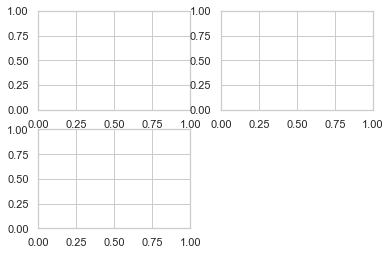

In [134]:
fig=plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)    
#这条代码的意思是：图像应该是2×2的（即最多4张图），且当前选中的是4个subplot中的第一个（编号从1开始）。如果再把后面两个subplot也创建出来

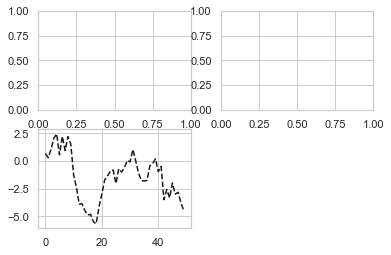

In [135]:
ax3.plot(np.random.randn(50).cumsum(), 'k--')  #k--线型
#matplotlib会在最后一个用过的subplot（如果没有则创建一个）上进行绘制
fig

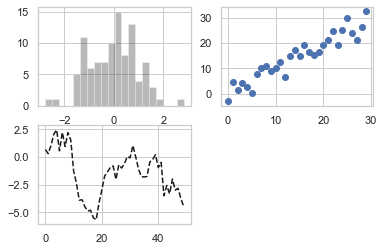

In [136]:
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3) #"k指颜色"
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
fig

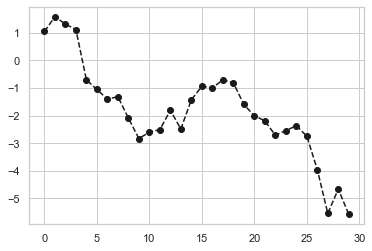

In [137]:
plt.plot(np.random.randn(30).cumsum(), 'ko--')  #(线加圈)

In [138]:
a=np.array([[1,2],[3,4]])
np.cumsum(a)

array([ 1,  3,  6, 10], dtype=int32)

##### 改变x轴刻度

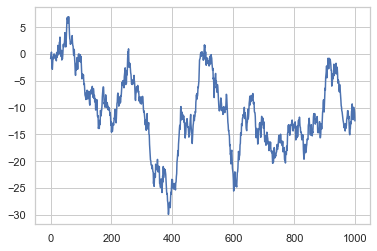

In [139]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

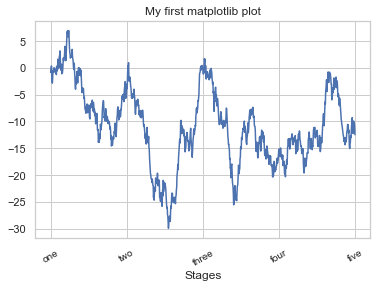

In [140]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')
fig
#y轴修改方式与此类似，只需把xtricks换为ytricks，xtick（ax不变为ay）

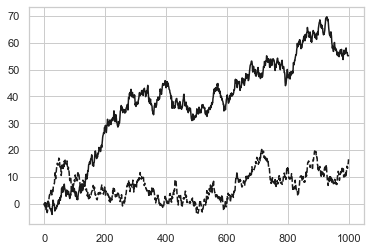

In [141]:
plt.plot(np.random.randn(1000).cumsum(), 'k', label='one')
plt.plot(np.random.randn(1000).cumsum(), 'k--', label='two')
plt.savefig('figpath.jpg')

### pandas与seaborn

In [120]:
import seaborn as sns

<AxesSubplot:>

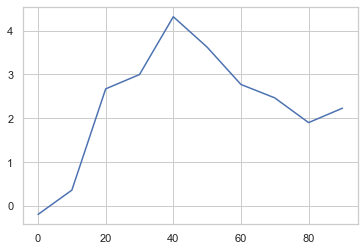

In [142]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

<AxesSubplot:>

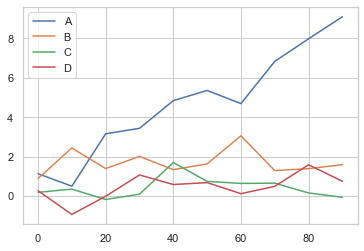

In [143]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=['A', 'B', 'C', 'D'], index=np.arange(0, 100, 10))
df.plot()

<AxesSubplot:>

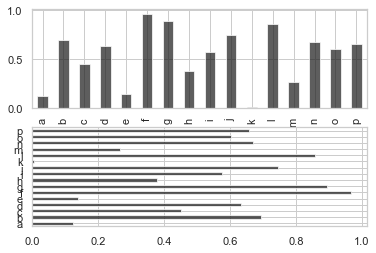

In [144]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)


<AxesSubplot:>

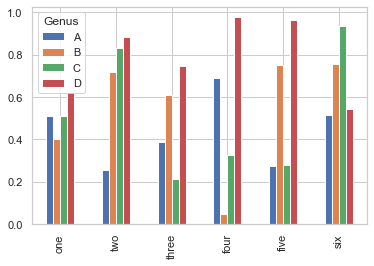

In [145]:
df = pd.DataFrame(np.random.rand(6, 4), index=['one', 'two', 'three', 'four','five', 'six'], columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df.plot.bar()

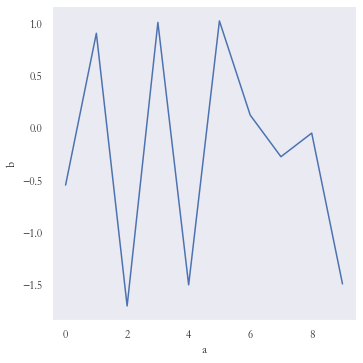

In [147]:
df = pd.DataFrame({'a': range(10), 'b': np.random.randn(10)})
sns.relplot(x="a", y="b", kind="line", data=df)

# 多维数据

Text(0.5, 0, '时间节点')

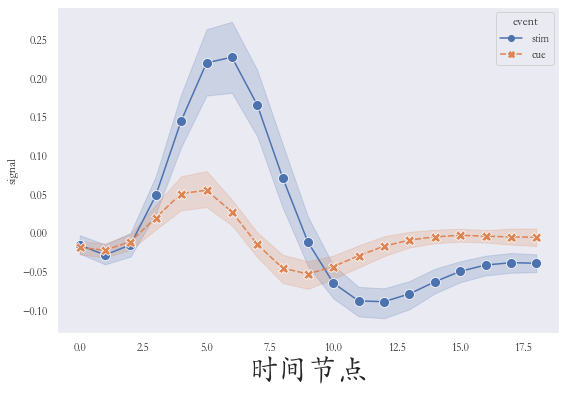

In [149]:
# 设置样式
sns.set(style = 'dark', context = 'notebook', font = 'STKaiti')    #font是指楷体
plt.figure(figsize = (9, 6))  #figsize设置图形的大小，单位英寸
fmri = pd.read_csv('D:/Downloads/fmri.csv') 
ax = sns.lineplot(x = 'timepoint',y = 'signal',hue = 'event',style = 'event', data = fmri,palette = 'deep',markers = True,markersize = 10)
plt.xlabel('时间节点',fontsize = 30)
#其中hue是根据event进行颜色的分类，style根据event属性分类指定样式（自定义为●和×），palette（画板，颜色）

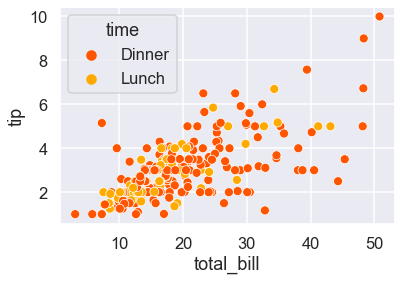

In [286]:
data = pd.read_table('D:/Downloads/tips.csv',sep=',')
sns.set(style = 'darkgrid', context = 'talk')
fig = sns.scatterplot(x = 'total_bill', y = 'tip',hue = 'time', data = data,palette = 'autumn')


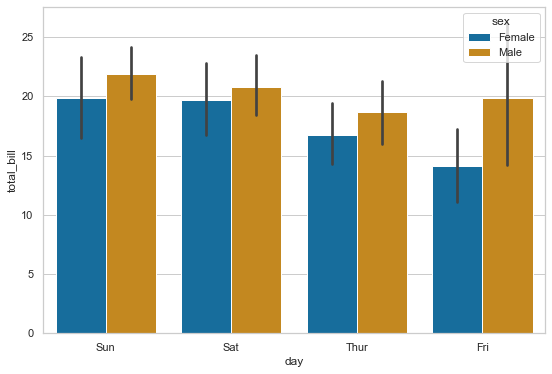

In [129]:
plt.figure(figsize = (9, 6))
sns.set(style = 'whitegrid')
tips = pd.read_csv('D:/Downloads/tips.csv') 
ax = sns.barplot(x = "day", y = "total_bill",data = tips,hue = 'sex',palette = 'colorblind')

<AxesSubplot:xlabel='year', ylabel='month'>

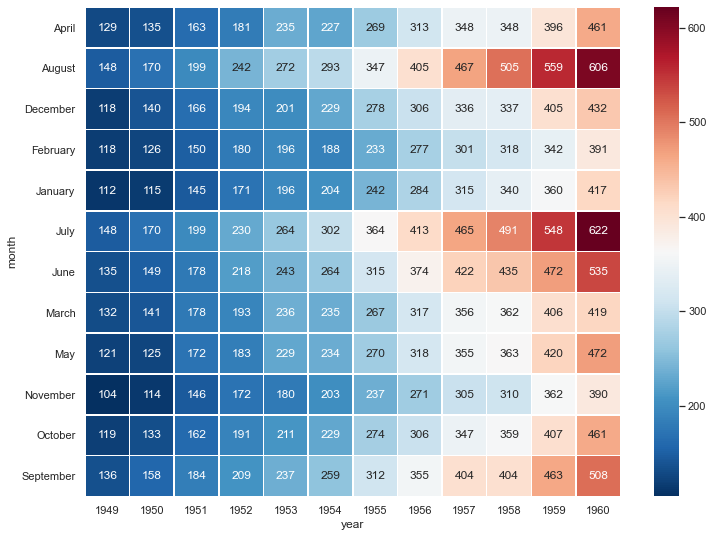

In [131]:
plt.figure(figsize = (12, 9))
flights = pd.read_csv('D:/Downloads/flights.csv')  
flights = flights.pivot("month", "year", "passengers")
sns.heatmap(flights, annot = True, fmt = 'd',cmap = 'RdBu_r', linewidths = 0.5)
# annot代表画上数值 fmt代表数值为整数，cmap代表颜色，linewidths是线宽